# Practical 5D
This practical is related to Example 2.
<br>Obtain the PCA output table, scree plot and loading plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import os

Read in the correlation matrix

In [2]:
correlation = pd.read_csv("Chp5Eg2.csv", names=['0.5s', '1s', '3s', '6s', '15s'])
correlation.index = ['0.5s', '1s', '3s', '6s', '15s']
correlation

,0.5s,1s,3s,6s,15s
0.5s,1.00,0.71,0.58,0.56,0.65
1s,0.71,1.00,0.71,0.60,0.69
3s,0.58,0.71,1.00,0.75,0.71
6s,0.56,0.60,0.75,1.00,0.74
15s,0.65,0.69,0.71,0.74,1.00


Obtain the eigenvalues and eigenvectors and put them into dataframes.

In [3]:
w, V = np.linalg.eig(correlation)                   # Students to fill in
w

array([3.68308861, 0.53125005, 0.33001244, 0.25877216, 0.19687674])

In [4]:
#Put the eigenvalues into a dataframe
w_df = pd.DataFrame(np.round(w,4), columns=['Eigenvalues'])
w_df.index = ['PC{}'.format(i) for i in range(1,len(w_df)+1)]
w_df

,Eigenvalues
PC1,3.6831
PC2,0.5313
PC3,0.3300
PC4,0.2588
PC5,0.1969


In [5]:
V

array([[-0.42239572, -0.66606983, -0.40295603, -0.4245783 ,  0.18786308],
       [-0.45056706, -0.37835111,  0.56571562,  0.28169892, -0.50443167],
       [-0.45672582,  0.32552216,  0.51511831, -0.28833683,  0.58047553],
       [-0.44386102,  0.53594802, -0.31004287, -0.3469872 , -0.54701043],
       [-0.46147599,  0.14140884, -0.39511874,  0.73269417,  0.27218356]])

In [6]:
V_df = pd.DataFrame(np.round(V,4), columns=['PC{}'.format(i) for i in range(1,len(w_df)+1)])
V_df.index = ['0.5s', '1s', '3s', '6s', '15s']
V_df = V_df.T
V_df

,0.5s,1s,3s,6s,15s
PC1,-0.4224,-0.4506,-0.4567,-0.4439,-0.4615
PC2,-0.6661,-0.3784,0.3255,0.5359,0.1414
PC3,-0.4030,0.5657,0.5151,-0.3100,-0.3951
PC4,-0.4246,0.2817,-0.2883,-0.3470,0.7327
PC5,0.1879,-0.5044,0.5805,-0.5470,0.2722


## Task 1
Using the eigenvalues and eigenvectors dataframes, write a function that can produce the PCA output table.

In [8]:
# Computes the % variance explained and cumulative % variance explained.
# Pass the eigenvalues and eigenvectors dataframes to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results_matrix(eValues, eVectors):
    
    # Compute the % explained variance for each PC
    tot_eigenvalues = eValues.sum()
    variance_ratios = np.round(eValues / tot_eigenvalues,4)
    variance_ratios.column = ['Explained Variance']    

    # Compute the cumulative % variance explained
    cum_variance_ratios = np.cumsum(variance_ratios)
    cum_variance_ratios.columns = ['Cumulative Explained Variance']
        
    # Return a concatenated DataFrame
    return pd.concat([eValues, variance_ratios, cum_variance_ratios], axis = 1)

In [9]:
results = pca_results_matrix(w_df, V_df)
results

C:\Users\3mm3t\AppData\Local\Temp\ipykernel_4748\1120102598.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  variance_ratios.column = ['Explained Variance']


,Eigenvalues,Eigenvalues,Cumulative Explained Variance
PC1,3.6831,0.7366,0.7366
PC2,0.5313,0.1063,0.8429
PC3,0.3300,0.0660,0.9089
PC4,0.2588,0.0518,0.9607
PC5,0.1969,0.0394,1.0001


## Task 2
Write the code to obtain the scree plot using the eigenvalues dataframe.

<Figure size 640x480 with 0 Axes>

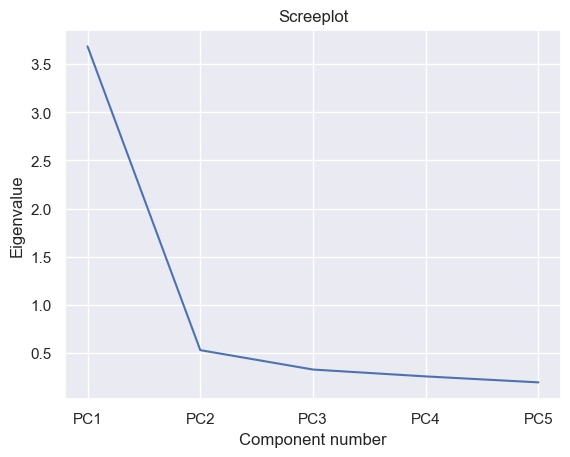

In [10]:
#Scree plot

plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(w_df)
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()


## Task 3
Using the eigenvectors dataframe, write a function that can produce the loading plot.

In [27]:
# This function plots the loading plot from the eigenvectors/PCs dataframe.
# Pass the eigenvectors/PCs dataframe to this function. Optional width, height and margin.
# This function returns the axes of the loading plot

def loadingplot_eVectors(eVectors, width=5, height=5, margin=1):

    fig, ax = plt.subplots(figsize = (width, height))

    #Set limits for figure
    x_min = min(eVectors.iloc[0,:].min(),0)-margin
    x_max = min(eVectors.iloc[0,:].min(),0)+margin
    y_min = min(eVectors.iloc[1,:].min(),0)-margin
    y_max = min(eVectors.iloc[1,:].min(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.1
    
    # Draw arrows and label them

    for i, v in enumerate(np.array(eVectors.iloc[0:2,:]).T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, eVectors.columns[i], color='black', ha='center', va='center', fontsize=12)
        
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)

    return ax

<Figure size 640x480 with 0 Axes>

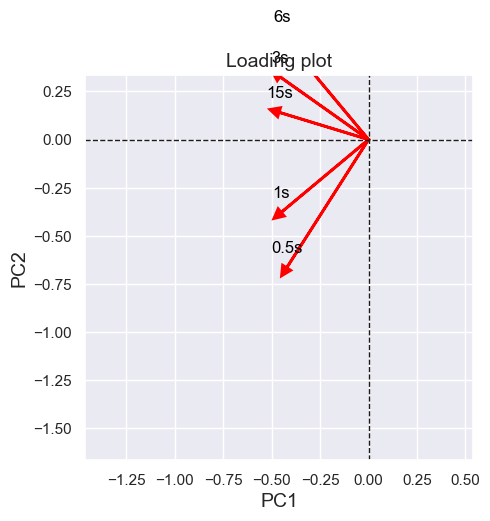

In [28]:
plt.clf()
ax2 = loadingplot_eVectors(V_df, width = 5, height = 5, margin = 1)
plt.show()